Hunter Bennett | Glass Lab | Kupffer Strains Project | 14 March 2023

Notebook generating UpSetPlot for comparison of overlap of parental F0, hybrid F1, and transplant NSG RNA-seq experiments

### Import packages, set plotting parameters

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import upsetplot as upset

Set working directory

In [2]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure4/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [3]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

Read in differential expression files for each analysis  
Set parameters

In [4]:
log2fc = 1
pval = 0.05
gene_list_dict ={}

In [5]:
comps = np.concatenate(
    [np.sort(glob.glob('./*f1nsg*f1nsg*deseq.txt')),
     np.sort(glob.glob('./*control*control*deseq.txt')),
     np.sort(glob.glob('./*NSG*NSG*deseq.txt'))])

Create dictionary of differential gene lists

In [6]:
for i in np.sort(comps):
    print(i)
    # read in gene expression data
    df = pd.read_csv(i,
                     sep='\t',
                     index_col=0)

    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[3]+'_up'] = list(sig_genes)

./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt
./balbcj_control.vs.c57bl6j_control.deseq.txt
./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt
./c57bl6j_NSG.vs.balbcj_NSG.deseq.txt
./c57bl6j_control.vs.balbcj_control.deseq.txt
./c57bl6j_f1nsg_variants.vs.balbcj_f1nsg_variants.deseq.txt


Upset plot for all comparisons

In [7]:
gene_list_upset = upset.from_contents({
    'C57 F0': gene_list_dict['c57bl6j_control_up'],
    'C57 F1-NSG': gene_list_dict['c57bl6j_f1nsg_variants_up'],
    'C57 F0-NSG': gene_list_dict['c57bl6j_NSG_up'],
    'BALB F0': gene_list_dict['balbcj_control_up'],
    'BALB F1-NSG': gene_list_dict['balbcj_f1nsg_variants_up'],
    'BALB F0-NSG': gene_list_dict['balbcj_NSG_up']
})

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

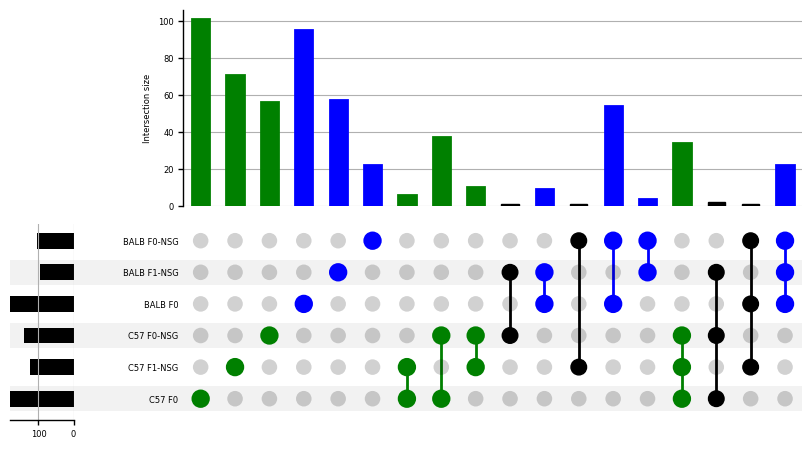

In [8]:
p = upset.UpSet(gene_list_upset, orientation="horizontal", sort_categories_by='input')
p.style_subsets(present=["BALB F0-NSG"], absent=["C57 F0-NSG", "C57 F1-NSG", "C57 F0"], facecolor="blue",
                    linewidth=2)
p.style_subsets(present=["BALB F1-NSG"], absent=["C57 F0-NSG", "C57 F1-NSG", "C57 F0"], facecolor="blue",
                    linewidth=2)
p.style_subsets(present=["BALB F0"], absent=["C57 F0-NSG", "C57 F1-NSG", "C57 F0"], facecolor="blue",
                    linewidth=2)
p.style_subsets(present=["C57 F0-NSG"], absent=["BALB F0-NSG", "BALB F1-NSG", "BALB F0"], facecolor="green",
                    linewidth=2)
p.style_subsets(present=["C57 F1-NSG"], absent=["BALB F0-NSG", "BALB F1-NSG", "BALB F0"], facecolor="green",
                    linewidth=2)
p.style_subsets(present=["C57 F0"], absent=["BALB F0-NSG", "BALB F1-NSG", "BALB F0"], facecolor="green",
                    linewidth=2)
p.plot()
